In [47]:
import pandas as pd
import urllib.request
import matplotlib

## Download latest covid cases file

In [5]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'
urllib.request.urlretrieve(url, "Covid19Casos.csv")

('Covid19Casos.csv', <http.client.HTTPMessage at 0x257fcb00fd0>)

## CSV to Dataframe

In [31]:
covidDF = pd.read_csv('Covid19Casos.csv')

## Useful transformantions

In [32]:
covidConfirmedDF = covidDF[covidDF['clasificacion_resumen'] == 'Confirmado']

## Grouping by Province

<AxesSubplot:ylabel='count'>

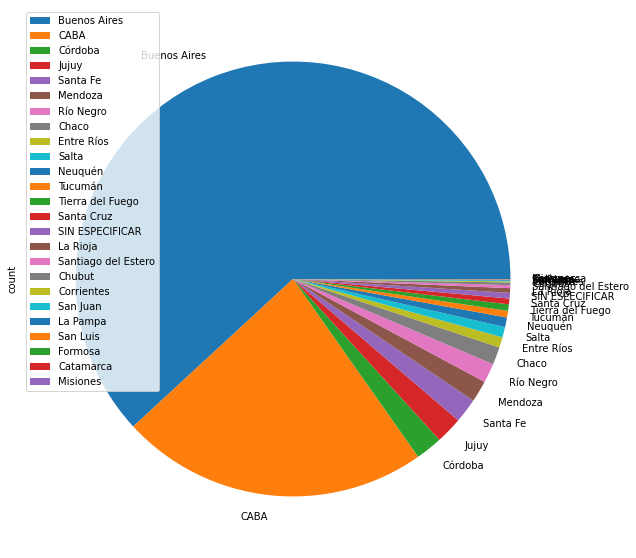

In [55]:
casesPerProvince = covidConfirmedDF.copy()
casesPerProvince['count'] = covidConfirmedDF.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
casesPerProvince = casesPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
casesPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', figsize=(10,10))